In [7]:
import uproot
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
import seaborn as sns
%matplotlib inline

In [31]:
file = uproot.open("tracking_losses_ntuple_Bd2KstEE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")
#file = uproot.open("tracking_losses_ntuple_Dst0ToD0EE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")

#look at particles only from Signal
allcolumns = file.arrays()
tracked = allcolumns[(allcolumns.isElectron) & (~allcolumns.lost) & (allcolumns.fromSignal)]
lost = allcolumns[(allcolumns.isElectron) & (allcolumns.lost) & (allcolumns.fromSignal)] 

#ak.num(tracked, axis=0)



In [143]:
#lost
l_eph = lost["brem_photons_pe"]
ak.nan_to_num(l_eph)
l_pT = lost["pt"]
l_sci_x = lost["scifi_hit_pos_x"]
ak.nan_to_num(l_sci_x)

#found
f_eph = tracked["brem_photons_pe"]
ak.nan_to_num(f_eph)
f_pT = tracked["pt"]
f_sci_x = tracked["scifi_hit_pos_x"]
ak.nan_to_num(f_sci_x)

<Array [[-676, -685, -694, ..., -873, -882], ...] type='9489 * var * float32'>

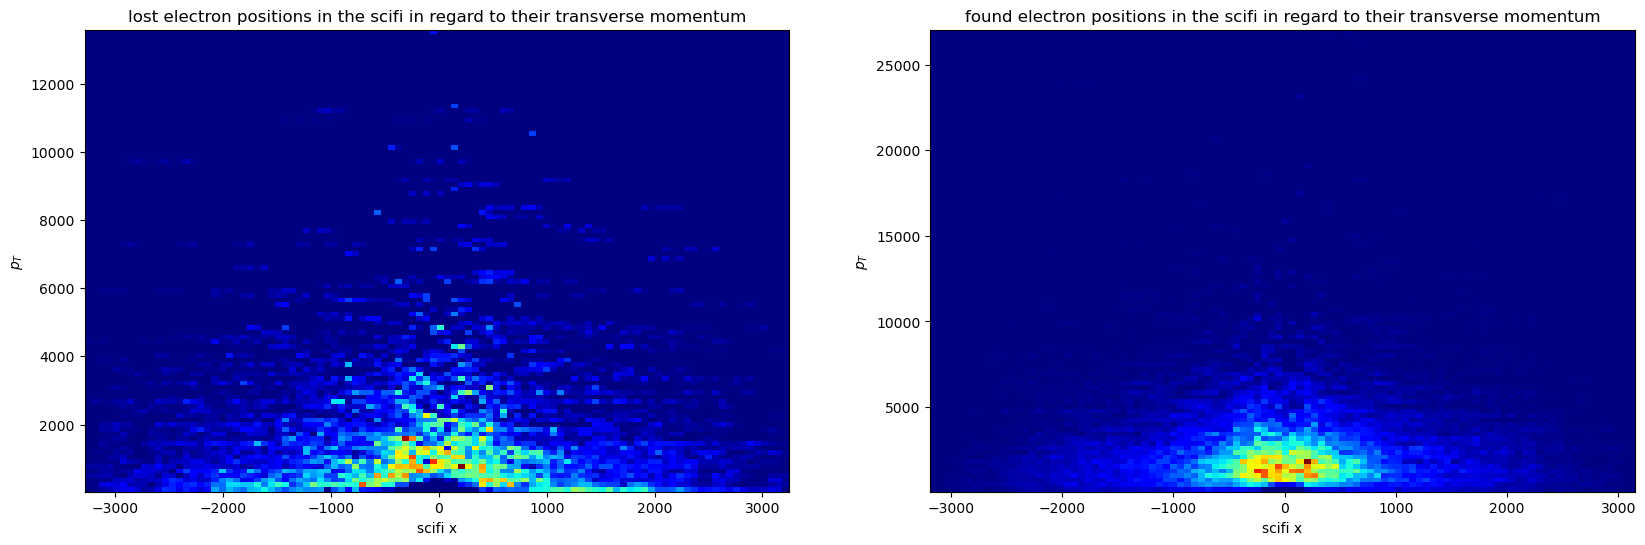

In [151]:
l_sci_x, l_pT = ak.broadcast_arrays(l_sci_x, l_pT)
f_sci_x, f_pT = ak.broadcast_arrays(f_sci_x, f_pT)
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

ax0.hist2d(ak.to_numpy(ak.flatten(l_sci_x)), ak.to_numpy(ak.flatten(l_pT)), bins=100,  cmap=plt.cm.jet)
ax0.set_xlabel("scifi x")
ax0.set_ylabel(r"$p_T$")
ax0.set_title("lost electron positions in the scifi in regard to their transverse momentum")

ax1.hist2d(ak.to_numpy(ak.flatten(f_sci_x)), ak.to_numpy(ak.flatten(f_pT)), bins=100,  cmap=plt.cm.jet)
ax1.set_xlabel("scifi x")
ax1.set_ylabel(r"$p_T$")
ax1.set_title("found electron positions in the scifi in regard to their transverse momentum")

plt.show()

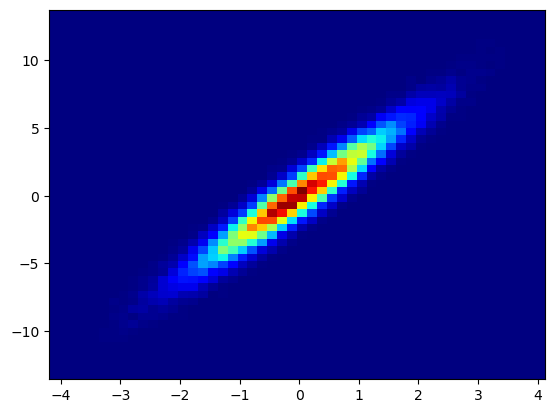

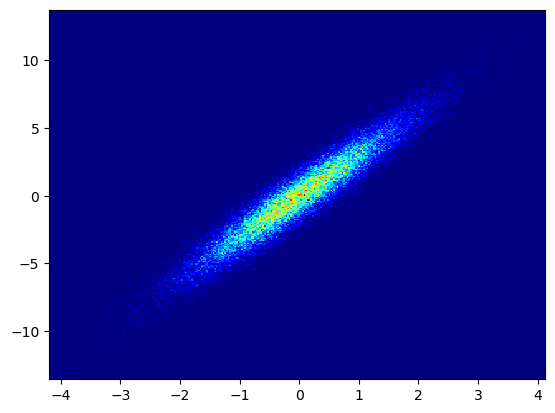

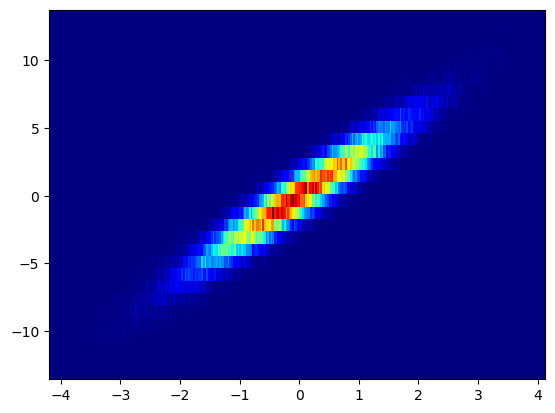

In [113]:
x = np.random.normal(size=50000)
y = x * 3 + np.random.normal(size=50000)
 
# Big bins
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
plt.show()
 
# Small bins
plt.hist2d(x, y, bins=(300, 300), cmap=plt.cm.jet)
plt.show()
 
# If you do not set the same values for X and Y, the bins won't be a square!
plt.hist2d(x, y, bins=(300, 30), cmap=plt.cm.jet)
plt.show()